In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from sklearn.cross_validation import train_test_split/

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
print("DataFrame Head: ")
df.head()

DataFrame Head: 


,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
index      53940 non-null int64
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,index,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.columns

Index(['index', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

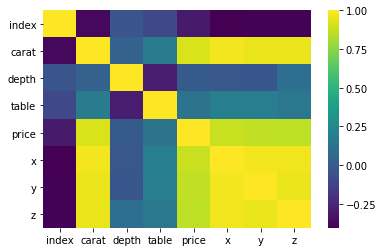

In [7]:
sns.heatmap(df.corr(),cmap='viridis')

In [8]:
df.columns

Index(['index', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

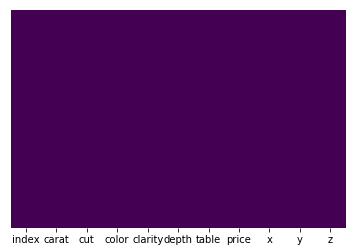

In [9]:
sns.heatmap(df.isnull (),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
x = df[['index','carat','table','x','y']]

In [11]:
y = df['price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 101)

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print(lm.intercept_)

4340.502502907855


In [16]:
print("Coefficients Value: ")
lm.coef_

Coefficients Value: 


array([ 8.85011779e-03,  1.00424960e+04, -5.88996737e+01, -1.28958695e+03,
        3.68449366e+02])

In [17]:
print("DataFrame coefficient for x_train")
cdf = pd.DataFrame(lm.coef_,x.columns,columns = ['Coeff'])

DataFrame coefficient for x_train


In [18]:
cdf

,Coeff
index,0.008850
carat,10042.496037
table,-58.899674
x,-1289.586949
y,368.449366


In [19]:
print("\nPredictions Part: \n")


Predictions Part: 



In [20]:
predictions = lm.predict(x_test)

In [21]:
print("\nPredictions s per x_test : ")       #Predicted Price
predictions


Predictions s per x_test : 


array([1988.12991796, 5573.74653959,  387.20971017, ..., 4140.50723253,
       5444.98262615,  284.16215292])

In [22]:
print("Predictions as per y_test : ")         #Actual price
y_test

Predictions as per y_test : 


46519     1781
8639      4452
23029      631
51641      544
25789    14775
6639      4089
3779      3461
28857      683
16807     6703
35980      921
51058     2331
6870      4128
4989      3740
40887     1176
36130      928
38500     1031
28296      432
14745     5937
34518      868
40156     1116
11538     5028
5237      3787
39717     1090
22225    10282
42790     1350
922       2880
25491    14278
12143     5174
28779      681
9803      4668
         ...  
36397      942
22372      628
19436     8089
8631      4449
15132     6084
28718      680
48106     1935
25692      644
8804      4475
46420     1768
41288     1210
39866     1101
29966      446
30812      743
19721     8294
45101     1648
24061    12207
23016      630
6645      4092
25728    14650
22047      628
14662     5918
43043     1375
49276     2090
13480     5534
22640    10688
1999      3099
8496      4420
8874      4484
41246     1208
Name: price, Length: 21576, dtype: int64

Plot for difference between actual values and estimated values


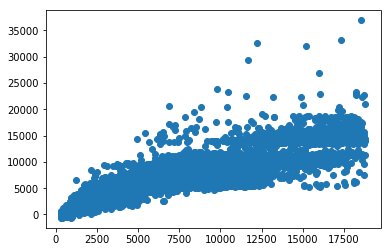

In [23]:
print("Plot for difference between actual values and estimated values")
plt.scatter(y_test,predictions)

C:\Users\Manisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


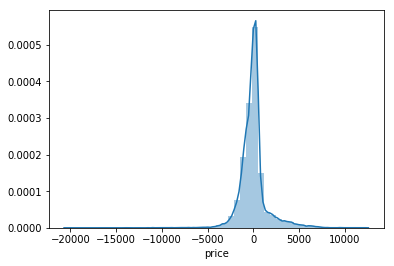

In [24]:
sns.distplot((y_test - predictions))        
#Normally distributed histogram depicts that current methadology is correct choice 

In [25]:
metrics.mean_absolute_error(y_test,predictions)

924.0007209696379

In [26]:
metrics.mean_squared_error(y_test,predictions)

2320456.5770060993

In [27]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))


1523.3044925444483

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
est= smf.ols('price ~ carat+table+x+y',df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5206.6451,191.530,27.185,0.000,4831.245,5582.045
carat,1.006e+04,62.344,161.430,0.000,9941.920,1.02e+04
table,-64.6527,2.991,-21.614,0.000,-70.515,-58.790
x,-1085.1368,36.270,-29.918,0.000,-1156.226,-1014.048
y,109.7652,25.665,4.277,0.000,59.461,160.069


In [30]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 7.935e+04
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:21:55   Log-Likelihood:            -4.7174e+05
No. Observations:               53940   AIC:                         9.435e+05
Df Residuals:                   53935   BIC:                         9.435e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5206.6451    191.530     27.185      0.000    4831.245    5582.045
carat       1.006e+04     62.344    161.430      0.000    9941.920    1.02e+04
table        -64.6527      2.991    -21.614      0.000     -70.515     -58.790
x          -1085.1368     36.270    -29.918      0.000   -1156.226   -1014.048
y            109.7652     25.665      4.277      0.000      59.461     160.069
==============================================================================
Omnibus:                    13895.370   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           319994.727
Skew:                           0.701   Prob(JB):                         0.00
Kurtosis:                      14.850   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""